# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('02-x_train-IEMOCAP-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('02-x_test-IEMOCAP-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('02-y_train-IEMOCAP-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('02-y_test-IEMOCAP-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)

In [3]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
1516,0.550053,-7.851800,15.903537,0.036933,-0.003562,0.202542,28.038530,-14.392128,21.499237,-10.632643,...,10.242093,707.808105,1232.899536,-80.775688,1712.241943,1073.216309,-86.732262,2688.523926,920.397949,-88.578697
602,0.268582,-13.223557,22.888321,0.017253,-0.002846,0.072490,29.461279,3.345391,19.835823,-8.335126,...,14.677291,615.641785,1341.745239,-97.127327,1632.324097,1065.154541,-104.506485,2701.830322,907.053040,-107.517441
518,0.257964,-7.856769,16.783792,0.013740,0.009768,0.069051,20.892841,-0.776871,19.555592,-5.960205,...,8.811817,592.482910,1322.476074,-132.927490,1544.822998,1075.153198,-137.887894,2574.113281,888.349548,-139.559494
2209,0.131380,-12.643758,23.016607,-0.007493,0.002672,0.033291,25.228651,1.379577,19.203630,-4.978724,...,3.333161,536.593567,1409.228149,-175.122360,1524.277344,1138.479248,-176.826843,2553.420410,1108.412109,-177.623947
1721,0.960153,-2.365955,11.661679,0.039753,-0.000313,0.395951,19.501293,-17.393946,11.897623,-18.749329,...,5.986082,757.639465,1337.688843,-92.532104,1718.021484,1095.973145,-94.381584,2702.448730,989.567627,-96.981438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.102714,-12.844368,20.696802,0.006191,-0.000033,0.020429,24.730604,3.961783,17.553076,-10.527103,...,5.856342,636.369507,1423.757568,-158.125610,1677.039429,1188.442749,-162.326111,2634.531250,1032.841309,-162.350204
1731,0.134119,-17.427670,26.202929,0.008741,-0.006540,0.027361,30.434385,1.428104,19.993570,-12.174898,...,16.571997,686.336060,1368.824585,-60.900349,1747.279785,1033.226685,-70.928970,2763.508789,966.669250,-73.436607
763,0.425805,-10.971887,20.394451,0.012249,-0.003465,0.135793,28.821161,-2.237694,18.211691,-11.256765,...,10.130011,541.355591,1303.519531,-108.097961,1520.017944,1032.616943,-110.971992,2595.402588,844.526855,-114.891777
835,0.084810,-13.789702,21.320992,-0.000025,0.006677,0.017291,25.605879,1.201977,23.603409,-7.546015,...,5.550917,608.902283,1421.750977,-148.870880,1643.862793,1232.202881,-154.884354,2580.996826,1020.791443,-154.421249


# **SELECCION DE CARACTERISTICAS**

In [4]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [5]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [6]:
overs = RandomOverSampler()

In [7]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [8]:
y_t_overs

,Emociones
0,2
1,2
2,2
3,3
4,0
...,...
3439,3
3440,3
3441,3
3442,3


# **NORMALIZACION DE CARACTERISTICAS**

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [10]:
x_train_std

array([[ 6.62209036e-01,  8.61885593e-01, -1.10293005e+00, ...,
         7.18077694e-01, -1.19689941e+00,  9.67151183e-01],
       [-2.90210007e-01, -1.02844205e+00,  1.06137903e+00, ...,
         9.20115359e-01, -1.39735079e+00,  4.41958320e-01],
       [-3.26138038e-01,  8.60136954e-01, -8.30173528e-01, ...,
        -1.01907628e+00, -1.67829241e+00, -4.46604195e-01],
       ...,
       [-7.84471958e-01, -1.44467352e+00,  1.24273051e+00, ...,
        -1.14421864e-03,  1.26747268e+00, -9.47523216e-01],
       [-6.89644008e-01, -9.65007782e-01,  1.60090748e+00, ...,
        -7.16099479e-01,  1.02954721e+00, -1.53491120e+00],
       [-8.69577463e-01, -7.43383849e-01,  3.01289005e-01, ...,
        -2.87317599e-01,  9.10337848e-01, -1.34401126e+00]])

# **MODELO DE MARCHINE LEARNING**

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
clf.fit(x_train_std, y_t_overs) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [12]:
#para generar 300 un nuevo modelo y guardar el que tiene mayor accuracy
from sklearn import metrics
mayor=0

for i in range(300):
  overs = RandomOverSampler()
  overs.fit(x_train, y_train)
  x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

  sc = StandardScaler()
  x_train_std = sc.fit_transform(x_t_overs)
  #para trasnformar los datos de testing
  x_test_std = sc.transform(x_test)

  clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
  clf.fit(x_train_std, y_t_overs)
  y_predict = clf.predict(x_test_std)
  predicion = metrics.accuracy_score(y_test, y_predict)
  if predicion >mayor:
    mayor= predicion
    modelo = clf
  print(f" prueba :{i} PRECISION ====  {metrics.accuracy_score(y_test, y_predict)} ")
clf= modelo

 prueba :0 PRECISION ====  0.5592105263157895 
 prueba :1 PRECISION ====  0.4868421052631579 
 prueba :2 PRECISION ====  0.5548245614035088 
 prueba :3 PRECISION ====  0.5021929824561403 
 prueba :4 PRECISION ====  0.5657894736842105 
 prueba :5 PRECISION ====  0.5679824561403509 
 prueba :6 PRECISION ====  0.5460526315789473 
 prueba :7 PRECISION ====  0.5482456140350878 
 prueba :8 PRECISION ====  0.4868421052631579 
 prueba :9 PRECISION ====  0.5548245614035088 
 prueba :10 PRECISION ====  0.5504385964912281 
 prueba :11 PRECISION ====  0.5460526315789473 
 prueba :12 PRECISION ====  0.4649122807017544 
 prueba :13 PRECISION ====  0.5197368421052632 
 prueba :14 PRECISION ====  0.43640350877192985 
 prueba :15 PRECISION ====  0.5153508771929824 
 prueba :16 PRECISION ====  0.4868421052631579 
 prueba :17 PRECISION ====  0.47149122807017546 
 prueba :18 PRECISION ====  0.506578947368421 
 prueba :19 PRECISION ====  0.5153508771929824 
 prueba :20 PRECISION ====  0.5833333333333334 
 

In [13]:
y_predict = clf.predict(x_test_std)
y_predict

array([0, 2, 2, 3, 2, 3, 3, 3, 2, 1, 3, 3, 2, 3, 0, 3, 2, 1, 3, 1, 3, 2,
       2, 3, 3, 0, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 0, 3, 1,
       2, 3, 2, 3, 3, 3, 2, 1, 1, 2, 0, 0, 3, 2, 2, 3, 2, 2, 3, 2, 0, 3,
       2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 1, 3, 3, 3, 3, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 3, 3, 2, 1, 0, 2, 2, 1, 3, 3, 1, 0, 0, 3, 0, 2, 3,
       2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 0, 3, 3, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 0, 3, 2, 1, 2, 3, 2, 3, 0, 2, 3, 0, 1, 2, 2, 2, 3, 2, 0,
       1, 3, 3, 2, 0, 3, 3, 2, 0, 2, 3, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 0, 3, 3, 3, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 3, 2, 2, 1, 3, 3, 3, 3, 0, 2, 2, 2, 3, 2, 3, 3, 1, 2,
       0, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0,
       2, 1, 3, 3, 3, 0, 2, 3, 2, 2, 2, 1, 3, 1, 3, 2, 3, 2, 0, 2, 2, 3,
       3, 2, 0, 3, 2, 3, 0, 2, 3, 3, 0, 3, 2, 3, 3, 2, 0, 2, 3, 3, 2, 2,
       2, 2, 3, 3, 3, 2, 1, 3, 0, 3, 3, 3, 2, 3, 3,

# **EVALUACION**

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.52      0.64      0.58        53
           1       0.23      0.16      0.19        56
           2       0.72      0.61      0.66       238
           3       0.59      0.83      0.69       109

    accuracy                           0.61       456
   macro avg       0.52      0.56      0.53       456
weighted avg       0.61      0.61      0.60       456



In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.52      0.64      0.58        53
           1       0.23      0.16      0.19        56
           2       0.72      0.61      0.66       238
           3       0.59      0.83      0.69       109

    accuracy                           0.61       456
   macro avg       0.52      0.56      0.53       456
weighted avg       0.61      0.61      0.60       456

Matriz de confusión, sin normalización
[[ 34   6  12   1]
 [ 16   9  25   6]
 [ 14  24 145  55]
 [  1   0  18  90]]


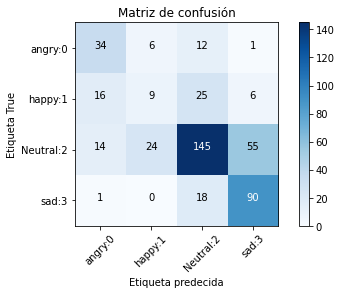

In [16]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')